# Biomarker search
Predictors of neurofeedback success?

In [16]:
import os
import pandas as pd
import src.my_settings as settings

sett = settings.settings()

In [22]:
# Read participants.tsv
df_p = pd.read_csv(os.path.join(sett["git_path"], "data", "participants.tsv"), sep="\t")

# remove sub-07 and sub-17
df_p = df_p[~df_p["participant_id"].isin(["sub-07", "sub-17"])]

df_p

,participant_id,age,sex,mini_proms,MIQ3_Internal,MIQ3_External,MIQ3_CInes,Handedness_LI,Augmented_LI
0,sub-01,31,F,13.5,5.50,5.75,5.75,90.0,93.33
1,sub-02,24,F,19.5,6.25,6.50,6.75,95.0,93.33
2,sub-03,38,M,29.5,6.75,6.50,7.00,70.0,56.67
3,sub-04,38,F,16.5,7.00,7.00,6.75,85.0,83.33
4,sub-05,26,F,31.5,6.00,5.50,5.75,90.0,90.00
5,sub-06,36,M,24.0,6.00,4.25,6.00,90.0,86.67
7,sub-08,24,F,27.5,6.75,6.00,4.25,70.0,76.77
8,sub-09,29,M,18.0,6.75,7.00,6.50,75.0,83.33
9,sub-10,36,F,16.5,4.50,6.00,4.00,100.0,93.33
10,sub-11,42,F,18.5,6.00,6.00,4.00,100.0,100.00


In [23]:
# load average correlation values
df = pd.read_pickle(os.path.join(sett["git_path"], "data", "RealTimeTBVOutputs.pkl"))

# remove sub-07 and sub-17
df = df[~df["sub"].isin(["sub-07", "sub-17"])]

df_persubject = df.groupby(["sub", "feedback"]).mean()
df_active = df_persubject.loc[(slice(None), "active"), :].copy()
df_active

,,correlation_tc,correlation_mean,correlation_mean_first_half,correlation_mean_second_half
sub,feedback,,,,
sub-01,active,"[[0.9491462326419966], [0.8728542440724366], [...",0.962485,1.005248,0.924473
sub-02,active,"[[0.6870329471695454], [0.6233786121717074], [...",1.298010,1.510473,1.109154
sub-03,active,"[[0.4103036783045442], [0.4326364126356264], [...",0.744021,0.875293,0.627333
sub-04,active,"[[0.8351683966135046], [0.6757506595653463], [...",0.890845,0.900014,0.882695
sub-05,active,"[[0.7836925509370624], [0.7106594733271855], [...",1.213030,1.162585,1.257869
sub-06,active,"[[1.0921025072491999], [1.044105963737873], [1...",1.081990,1.152273,1.019516
sub-08,active,"[[0.895138502305214], [0.837598857737674], [0....",0.992871,1.306857,0.713773
sub-09,active,"[[1.2053618416131795], [1.1686134852018455], [...",1.163370,1.406240,0.947485
sub-10,active,"[[1.1164255663394613], [1.136263579707882], [0...",1.280417,1.557883,1.033780


In [ ]:
# join df_active with df_p in a new dataframe
df_joined = pd.merge(df_active, df_p, left_on="sub", right_on="participant_id")
df_joined

## MI-Q3 and average correlation during active NF

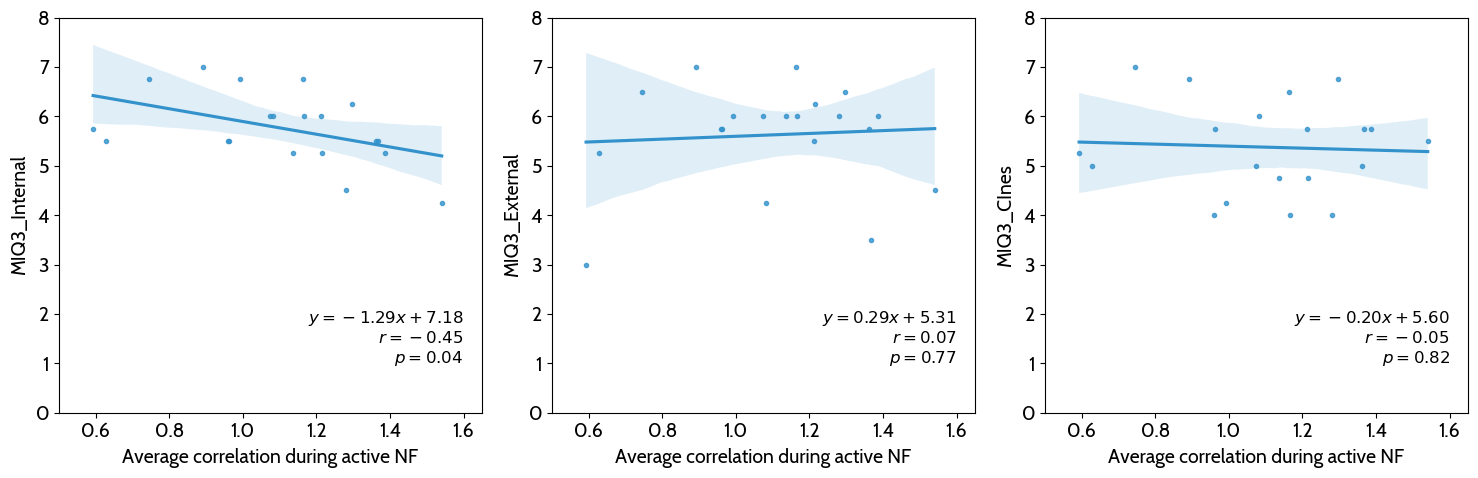

In [59]:
# let's build a figure with 3 subplots (1 row, 3 columns) with:
# subplot 1 - linear regression between correlation_mean and MIQ3_Internal
# subplot 2 - linear regression between correlation_mean and MIQ3_External
# subplot 3 - linear regression between correlation_mean and MIQ3_CInes

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, miq in enumerate(["MIQ3_Internal", "MIQ3_External", "MIQ3_CInes"]):
    sns.regplot(
        data=df_joined,
        x="correlation_mean",
        y=miq,
        ax=axs[i],
        marker=".",
        color="#3392CC",
    )
    # axs[i].set_title(f"Correlation between correlation_mean and {miq}")
    axs[i].set_xlabel("Average correlation during active NF")
    axs[i].set_ylabel(miq)
    axs[i].set_ylim(0, 8)
    axs[i].set_xlim(0.5, 1.65)
    slope, intercept, r_value, p_value, std_err = linregress(
        df_joined["correlation_mean"], df_joined[miq]
    )
    axs[i].text(
        1.6,
        1,
        f"$y={slope:.2f}x + {intercept:.2f}$\n$r={r_value:.2f}$\n$p={p_value:.2f}$",
        fontsize=12,
        ha="right",
    )

plt.tight_layout()
plt.show()

## Mini-PROMS and average correlation

Text(1.6, 30, '$y=-2.75x + 22.19$\n$r=-0.12$\n$p=0.61$')

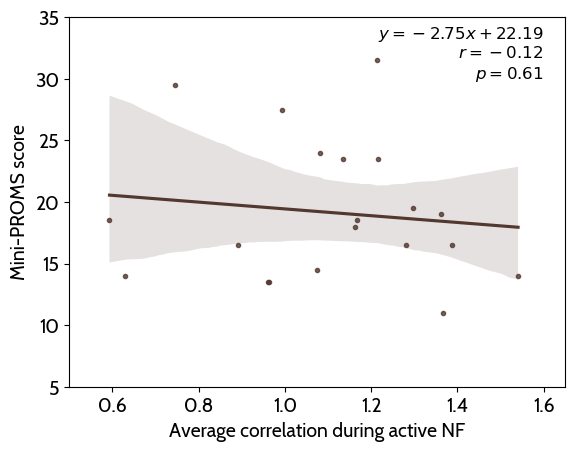

In [65]:
# regression plot between correlation_mean and mini_proms

sns.regplot(
    data=df_joined,
    x="correlation_mean",
    y="mini_proms",
    marker=".",
    color="#533830",
)
plt.xlabel("Average correlation during active NF")
plt.ylabel("Mini-PROMS score")
plt.ylim(5, 35)
plt.xlim(0.5, 1.65)
slope, intercept, r_value, p_value, std_err = linregress(
    df_joined["correlation_mean"], df_joined["mini_proms"]
)
plt.text(
    1.6,
    30,
    f"$y={slope:.2f}x + {intercept:.2f}$\n$r={r_value:.2f}$\n$p={p_value:.2f}$",
    fontsize=12,
    ha="right",
)